# Import Library

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
from nltk.corpus import stopwords
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Loading Dataset

In [ ]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.read_csv('review_whatsapp.csv')

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

app_reviews_df

,Review
0,abis di upgrade malah gak bisa kirim video dan...
1,semenjak update hasil kamera depan WhatsApp sa...
2,"Untuk sekarang, update banyak yang lambat, pad..."
3,setelah update versi terbaru secara otomatis k...
4,"pas di-update malah ngelag ni wa, jaringan bag..."
...,...
9995,"sdh bagus, tapi lebih bagus lg klw ad fitur ar..."
9996,Kenapa wa saya logout terus ya harus masukan n...
9997,WA emang udah canggih tapi kenapa di WA saya g...
9998,Semuanya sudah oke Cuma keganggu dengan adanya...


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = app_reviews_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

clean_df.shape

(10000, 1)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


# Preprocessing

## cleaningText(text)

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)           # Menghapus mention
    text = re.sub(r'#\S+', '', text)                     # Menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text)                  # Menghapus RT
    text = re.sub(r'https?://\S+', '', text)             # Menghapus link
    text = re.sub(r'\d+', '', text)                      # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)                  # Menghapus tanda baca
    text = text.replace('\n', ' ')                       # Ganti newline jadi spasi
    text = text.strip()                                  # Menghapus spasi di awal/akhir
    return text

In [ ]:
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)
clean_df.head()

,Review,text_clean
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...


## CasefoldingText(text)

In [ ]:
def casefoldingText(text):
    return text.lower()

In [ ]:
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefoldingText)
clean_df.head()

,Review,text_clean,text_casefolding
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...


## Fixing Slangword

In [ ]:
from collections import Counter

tokens = word_tokenize(' '.join(clean_df['text_casefolding']))

word_counts = Counter(tokens)
most_common = word_counts.most_common(1500)

# Buat DataFrame dan simpan ke CSV
df_most_common = pd.DataFrame(most_common, columns=['word', 'count'])
df_most_common.to_csv('kata_yang_sering_muncul_1500.csv', index=False)

most_common

[('di', 9398),
 ('saya', 7297),
 ('bisa', 5664),
 ('ada', 5611),
 ('whatsapp', 4751),
 ('nya', 4468),
 ('tidak', 4354),
 ('update', 4015),
 ('fitur', 3972),
 ('wa', 3742),
 ('dan', 3579),
 ('tolong', 3392),
 ('yang', 3245),
 ('ini', 3211),
 ('tapi', 2597),
 ('padahal', 2373),
 ('kenapa', 2282),
 ('sudah', 2161),
 ('yg', 2158),
 ('lagi', 2157),
 ('ga', 2027),
 ('status', 2015),
 ('bagus', 2015),
 ('untuk', 2013),
 ('udah', 1990),
 ('video', 1974),
 ('ya', 1757),
 ('aplikasi', 1685),
 ('gak', 1584),
 ('jadi', 1573),
 ('musik', 1548),
 ('juga', 1531),
 ('itu', 1513),
 ('ke', 1448),
 ('aku', 1435),
 ('mau', 1404),
 ('baru', 1361),
 ('story', 1335),
 ('belum', 1306),
 ('perbaiki', 1301),
 ('buat', 1295),
 ('muncul', 1255),
 ('aja', 1230),
 ('chat', 1212),
 ('sangat', 1171),
 ('hp', 1161),
 ('sama', 1160),
 ('malah', 1156),
 ('sekarang', 1135),
 ('kalo', 1096),
 ('atau', 1071),
 ('foto', 1053),
 ('dari', 1008),
 ('lain', 988),
 ('banget', 956),
 ('kok', 940),
 ('spam', 912),
 ('makin', 903),

In [ ]:
slangwords = slangwords = {
    'g': 'tidak',
    'gk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'ngga': 'tidak',
    'nggak': 'tidak',
    'ngak': 'tidak',
    'yg': 'yang',
    'udh': 'sudah',
    'udah': 'sudah',
    'dah': 'sudah',
    'uda': 'sudah',
    'aja': 'saja',
    'aj': 'saja',
    'jg': 'juga',
    'tp': 'tapi',
    'tpi': 'tapi',
    'trs': 'terus',
    'bgt': 'banget',
    'bngt': 'banget',
    'bgtnya': 'banget',
    'lgi': 'lagi',
    'lg': 'lagi',
    'ny': 'nya',
    'sya': 'saya',
    'sy': 'saya',
    'gua': 'saya',
    'gw': 'saya',
    'ku': 'saya',
    'lo': 'kamu',
    'lu': 'kamu',
    'biar': 'agar',
    'knp': 'kenapa',
    'kenp': 'kenapa',
    'klo': 'kalau',
    'kalo': 'kalau',
    'kalaw': 'kalau',
    'blm': 'belum',
    'belom': 'belum',
    'blum': 'belum',
    'blom': 'belum',
    'call': 'telepon',
    'mo': 'mau',
    'dlu': 'dulu',
    'ko': 'kok',
    'makasih': 'terima kasih',
    'makasi': 'terima kasih',
    'bisaaa': 'bisa',
    'bisaa': 'bisa',
    'bangettt': 'banget',
    'tau': 'tahu',
    'parahh': 'parah',
    'parah': 'berlebihan',
    'wa': 'whatsapp',
    'hp': 'handphone',
    'dong': 'permintaan',
    'bikin': 'buat',
    'pas': 'ketika',
    'vidio': 'video',
    'pake': 'pakai',
    'sw': 'status wa',
    'gabisa': 'tidak bisa',
    'gimana': 'bagaimana',
    'cuma': 'hanya',
    'ngirim': 'mengirim',
    'min': 'admin',
    'tetep': 'tetap',
    'karna': 'karena',
    'yaa': 'ya',
    'ya': 'iya',
    'pdhl': 'padahal',
    'd': 'di',
    'gini': 'begini',
    'liat': 'lihat',
    'temen': 'teman',
    'vc': 'video call',
    'notif': 'notifikasi',
    'telpon': 'telepon',
    'nomer': 'nomor',
    'no': 'nomor',
    'sampe': 'sampai',
    'up': 'pembaruan',
    'nih': 'ini',
    'ni': 'nih',
    'tibatiba': 'tiba-tiba',
    'tiba2': 'tiba-tiba',
    'skrg': 'sekarang',
    'tambahin': 'tambahkan',
    'doang': 'saja',
    'gaada': 'nggak ada',
    'org': 'orang',
    'jdi': 'jadi',
    'ilang': 'hilang',
    'ngebug': 'bug',
    'nunggu': 'menunggu',
    'eror': 'error',
    'kek': 'seperti',
    'kayak': 'seperti',
    'kayk': 'seperti',
    'kyak': 'seperti',
    'kyk': 'seperti',
    'sm': 'sama',
    'smua': 'semua',
    'mulu': 'terus-menerus',
    'punyaku': 'punya saya',
    'baguss': 'bagus',
    'keren': 'bagus',
    'benerin': 'perbaiki',
    'burik': 'jelek',
    'lemot': 'lambat',
    'kesini': 'ke sini',
    'ribet': 'sulit',
    'dapet': 'dapat',
    'whatsap': 'whatsapp',
    'app': 'aplikasi',
    'enak': 'nyaman',
    'ubah²': 'ubah-ubah',
    'settingan': 'pengaturan',
    'bnyk': 'banyak',
    'bnyak': 'banyak',
    'banyk': 'banyak'
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        fixed_words.append(slangwords[word] if word in slangwords else word)
    return ' '.join(fixed_words)

In [ ]:
clean_df['fix_slangword'] = clean_df['text_casefolding'].apply(fix_slangwords)
clean_df['fix_slangword'] = clean_df['fix_slangword'].apply(casefoldingText)
clean_df['fix_slangword'] = clean_df['fix_slangword'].apply(casefoldingText)
clean_df.head()

,Review,text_clean,text_casefolding,fix_slangword
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...


## TokenizingText(text)

In [ ]:
def tokenizingText(text):
    return word_tokenize(text)

In [ ]:
clean_df['text_tokenizing'] = clean_df['fix_slangword'].apply(tokenizingText)
clean_df.head()

,Review,text_clean,text_casefolding,fix_slangword,text_tokenizing
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...,"[abis, di, upgrade, malah, tidak, bisa, kirim,..."
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...,"[semenjak, update, hasil, kamera, depan, whats..."
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,"[untuk, sekarang, update, banyak, yang, lambat..."
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,"[setelah, update, versi, terbaru, secara, otom..."
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...,"[ketika, diupdate, malah, ngelag, nih, whatsap..."


## FilteringText(text)

In [ ]:
def filteringText(words):
    return [word for word in words if word not in stop_words]

stop_words = set(stopwords.words('indonesian'))
# Tambahan kata umum jika diperlukan
additional_stopwords = [
    'saya', 'ada', 'nya', 'tidak', 'dan', 'ini', 'yang', 'tapi', 'padahal', 'kenapa', 'lagi', 'sudah',
    'untuk', 'udah', 'ya', 'jadi', 'juga', 'ke', 'itu', 'mau', 'buat', 'belum', 'aja', 'sama', 'sekarang',
    'atau', 'dari', 'dengan', 'lain', 'dong', 'mohon', 'orang', 'terus', 'selalu', 'saat', 'semua',
    'karena', 'kalau', 'seperti', 'masih', 'lebih', 'kasih', 'harus', 'pas', 'setelah', 'sih',
    'kita', 'apa', 'sekali', 'kali', 'saja', 'pada', 'pun', 'akan', 'namun', 'tanpa',
    'jika', 'tetapi', 'no', 'anda', 'kami', 'oleh', 'in', 'loh', 'nih', 'deh', 'si', 'ko', 'yah', 'dah',
    'iyaa', 'oke', 'ok', 'kaya', 'kayak', 'doang', 'cuma', 'cuman', 'mulu', 'banget',
    'mah', 'dulu', 'gitu', 'iya', 'baru', 'biar', 'dapat', 'pake', 'tentu', 'mungkin', 'biasa',
    'terlalu', 'sering', 'kadang', 'abis', 'update', 'fitur', 'tolong','story', 'perbaiki', 'muncul',
    'kok', 'spam', 'makin', 'bug', 'lama', 'kirim', 'akun', 'pesan', 'terbaru',
    'file', 'diperbaiki', 'versi', 'musiknya', 'upload','terimakasih', 'masalah', 'segera',
    'kontak', 'pengguna', 'pakai', 'kembali', 'tambah', 'blokir', 'semoga', 'aplikasinya',
    'grup', 'hapus', 'panggilan', 'download', 'soalnya', 'upgrade', 'ulang',
    'notifikasi', 'diupdate', 'fiturnya', 'minta', 'perbarui', 'maaf', 'pembaruan', 'error',
    'admin', 'katanya', 'tuh','lagunya','post', 'an', 'gunakan', 'telepon', 'pengaturan',
    'bantuannya', 'kembalikan', 'melihat', 'stiker', 'semuanya', 'mendukung', 'media', 'detik',
    'tag', 'edit', 'menambahkan', 'dibuka', 'nama', 'posting', 'menit', 'suaranya', 'memakai',
    'privasi', 'kode', 'bantu'
]

stop_words.update(additional_stopwords)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
clean_df['text_filtering'] = clean_df['text_tokenizing'].apply(filteringText)
clean_df.head()

,Review,text_clean,text_casefolding,fix_slangword,text_tokenizing,text_filtering
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...,"[abis, di, upgrade, malah, tidak, bisa, kirim,...","[video, status, video, ubah-ubah, handphone, r..."
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...,"[semenjak, update, hasil, kamera, depan, whats...","[semenjak, hasil, kamera, whatsapp, bercak, hi..."
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,"[untuk, sekarang, update, banyak, yang, lambat...","[lambat, penasaran, filter, video, musik, audi..."
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,"[setelah, update, versi, terbaru, secara, otom...","[otomatis, dak, bs, status, bentuk, video, ket..."
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...,"[ketika, diupdate, malah, ngelag, nih, whatsap...","[ngelag, whatsapp, jaringan, bagus, mengirim, ..."


## StemmingText(text)

In [ ]:
def stemmingText(words):
    return [stemmer.stem(word) for word in words]

In [ ]:
clean_df['text_stemming'] = clean_df['text_filtering'].apply(stemmingText)
clean_df.head()

,Review,text_clean,text_casefolding,fix_slangword,text_tokenizing,text_filtering,text_stemming
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...,"[abis, di, upgrade, malah, tidak, bisa, kirim,...","[video, status, video, ubah-ubah, handphone, r...","[video, status, video, ubah, handphone, reset,..."
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...,"[semenjak, update, hasil, kamera, depan, whats...","[semenjak, hasil, kamera, whatsapp, bercak, hi...","[semenjak, hasil, kamera, whatsapp, bercak, hi..."
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,"[untuk, sekarang, update, banyak, yang, lambat...","[lambat, penasaran, filter, video, musik, audi...","[lambat, penasaran, filter, video, musik, audi..."
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,"[setelah, update, versi, terbaru, secara, otom...","[otomatis, dak, bs, status, bentuk, video, ket...","[otomatis, dak, bs, status, bentuk, video, ter..."
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...,"[ketika, diupdate, malah, ngelag, nih, whatsap...","[ngelag, whatsapp, jaringan, bagus, mengirim, ...","[ngelag, whatsapp, jaring, bagus, kirim, seper..."


## ToSentence(list_words)

In [ ]:
def toSentence(words):
    return ' '.join(words)

In [ ]:
clean_df['text_sentence'] = clean_df['text_stemming'].apply(toSentence)
clean_df.head()

,Review,text_clean,text_casefolding,fix_slangword,text_tokenizing,text_filtering,text_stemming,text_sentence
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...,"[abis, di, upgrade, malah, tidak, bisa, kirim,...","[video, status, video, ubah-ubah, handphone, r...","[video, status, video, ubah, handphone, reset,...",video status video ubah handphone reset setel ...
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...,"[semenjak, update, hasil, kamera, depan, whats...","[semenjak, hasil, kamera, whatsapp, bercak, hi...","[semenjak, hasil, kamera, whatsapp, bercak, hi...",semenjak hasil kamera whatsapp bercak hitam fo...
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,"[untuk, sekarang, update, banyak, yang, lambat...","[lambat, penasaran, filter, video, musik, audi...","[lambat, penasaran, filter, video, musik, audi...",lambat penasaran filter video musik audio stat...
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,"[setelah, update, versi, terbaru, secara, otom...","[otomatis, dak, bs, status, bentuk, video, ket...","[otomatis, dak, bs, status, bentuk, video, ter...",otomatis dak bs status bentuk video terang duk...
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...,"[ketika, diupdate, malah, ngelag, nih, whatsap...","[ngelag, whatsapp, jaringan, bagus, mengirim, ...","[ngelag, whatsapp, jaring, bagus, kirim, seper...",ngelag whatsapp jaring bagus kirim sepertistik...


# Pelebelan

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score == 0):
        polarity = 'neutral'         # Jika skor sentimen sama dengan 0, maka polaritas adalah netral
    elif (score < 0):
        polarity = 'negative'        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    4811
positive    3089
neutral     2100
Name: count, dtype: int64


In [ ]:
clean_df

,Review,text_clean,text_casefolding,fix_slangword,text_tokenizing,text_filtering,text_stemming,text_sentence,polarity_score,polarity
0,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah gak bisa kirim video dan...,abis di upgrade malah tidak bisa kirim video d...,"[abis, di, upgrade, malah, tidak, bisa, kirim,...","[status, ubah-ubah, handphone, reset, setelan,...","[status, ubah, handphone, reset, setel, pabrik...",status ubah handphone reset setel pabrik teran...,-3,negative
1,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan WhatsApp sa...,semenjak update hasil kamera depan whatsapp sa...,semenjak update hasil kamera depan whatsapp sa...,"[semenjak, update, hasil, kamera, depan, whats...","[semenjak, hasil, kamera, bercak, hitam, kirai...","[semenjak, hasil, kamera, bercak, hitam, kirai...",semenjak hasil kamera bercak hitam kirain kame...,-2,negative
2,"Untuk sekarang, update banyak yang lambat, pad...",Untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,untuk sekarang update banyak yang lambat padah...,"[untuk, sekarang, update, banyak, yang, lambat...","[lambat, penasaran, filter, audio, status, eh,...","[lambat, penasaran, filter, audio, status, eh,...",lambat penasaran filter audio status eh telat ...,-5,negative
3,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,setelah update versi terbaru secara otomatis k...,"[setelah, update, versi, terbaru, secara, otom...","[otomatis, dak, bs, status, bentuk, keterangan...","[otomatis, dak, bs, status, bentuk, terang, du...",otomatis dak bs status bentuk terang dukung se...,14,positive
4,"pas di-update malah ngelag ni wa, jaringan bag...",pas diupdate malah ngelag ni wa jaringan bagus...,pas diupdate malah ngelag ni wa jaringan bagus...,ketika diupdate malah ngelag nih whatsapp jari...,"[ketika, diupdate, malah, ngelag, nih, whatsap...","[ngelag, jaringan, bagus, mengirim, sepertisti...","[ngelag, jaring, bagus, kirim, sepertistikerpe...",ngelag jaring bagus kirim sepertistikerpesan s...,4,positive
...,...,...,...,...,...,...,...,...,...,...
9995,"sdh bagus, tapi lebih bagus lg klw ad fitur ar...",sdh bagus tapi lebih bagus lg klw ad fitur ars...,sdh bagus tapi lebih bagus lg klw ad fitur ars...,sdh bagus tapi lebih bagus lagi klw ad fitur a...,"[sdh, bagus, tapi, lebih, bagus, lagi, klw, ad...","[sdh, bagus, bagus, klw, ad, arsip, ig]","[sdh, bagus, bagus, klw, ad, arsip, ig]",sdh bagus bagus klw ad arsip ig,-9,negative
9996,Kenapa wa saya logout terus ya harus masukan n...,Kenapa wa saya logout terus ya harus masukan n...,kenapa wa saya logout terus ya harus masukan n...,kenapa whatsapp saya logout terus iya harus ma...,"[kenapa, whatsapp, saya, logout, terus, iya, h...","[logout, masukan, nomor, berulang, terkena, me...","[logout, masuk, nomor, ulang, kena, pulih]",logout masuk nomor ulang kena pulih,0,neutral
9997,WA emang udah canggih tapi kenapa di WA saya g...,WA emang udah canggih tapi kenapa di WA saya g...,wa emang udah canggih tapi kenapa di wa saya g...,whatsapp emang sudah canggih tapi kenapa di wh...,"[whatsapp, emang, sudah, canggih, tapi, kenapa...","[emang, canggih, meta, ai, meta, ai, tenang, t...","[emang, canggih, meta, ai, meta, ai, tenang, t...",emang canggih meta ai meta ai tenang teman met...,9,positive
9998,Semuanya sudah oke Cuma keganggu dengan adanya...,Semuanya sudah oke Cuma keganggu dengan adanya...,semuanya sudah oke cuma keganggu dengan adanya...,semuanya sudah oke hanya keganggu dengan adany...,"[semuanya, sudah, oke, hanya, keganggu, dengan...","[keganggu, saluran, saluran, saluran, saluran,...","[ganggu, salur, salur, salur, salur, minimal, ...",ganggu salur salur salur salur minimal sembuny...,-4,negative


In [ ]:
print(f"Total ulasan terkumpul: {len(clean_df)}")

Total ulasan terkumpul: 10000


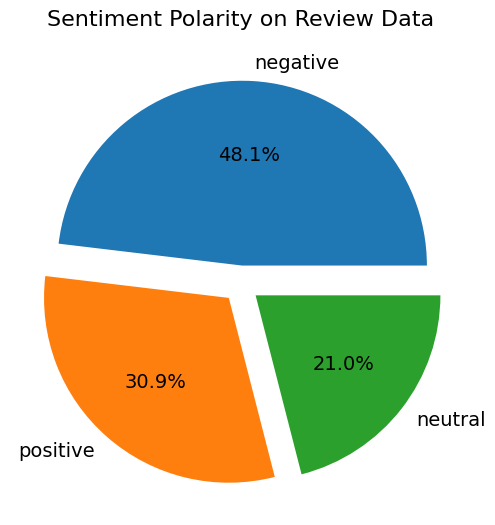

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = clean_df['polarity'].value_counts().tolist()

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = clean_df['polarity'].value_counts().index.tolist()

# Menentukan explode dengan panjang yang sesuai dengan jumlah kategori.
explode = [0.1] * len(labels)  # Semua bagian sedikit terpisah

# Membuat pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart
plt.show()

In [ ]:
clean_df['text_filtering'].head()

,text_filtering
0,"[video, status, video, ubah-ubah, handphone, r..."
1,"[semenjak, hasil, kamera, whatsapp, bercak, hi..."
2,"[lambat, penasaran, filter, video, musik, audi..."
3,"[otomatis, dak, bs, status, bentuk, video, ket..."
4,"[ngelag, whatsapp, jaringan, bagus, mengirim, ..."


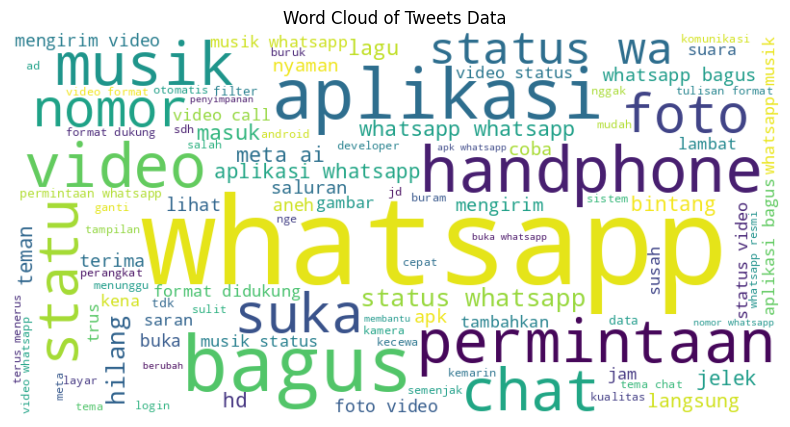

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ubah setiap list kata menjadi string, lalu gabungkan semuanya
text_data = ' '.join([' '.join(words) for words in clean_df['text_filtering']])


wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text_data)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets Data')
plt.show()


# Modeling

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2


# Objective untuk SVM
def objective_svm(trial):
    C = trial.suggest_float('C', 0.1, 10.0, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42, class_weight='balanced')

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()

## Menangani data imbalanced dan Ekstraksi Fitur TF-IDF

In [ ]:
# Input & target
X = clean_df['text_sentence']
y = clean_df['polarity']

# Ekstraksi fitur: TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3)
)
X_vectorized = vectorizer.fit_transform(X)

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_vectorized, y)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(14433, 5000)
(14433,)


## SVM

### SVM,  Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20

#### Split Data 80/20

In [ ]:
# Split data: 80/20
X_train_svm_80, X_test_svm_80, y_train_svm_80, y_test_svm_80 = train_test_split(X_resampled,
                                                                                y_resampled,
                                                                                test_size=0.2,
                                                                                random_state=42)
X_train = X_train_svm_80
y_train = y_train_svm_80

#### Optuna untuk mencari parameter terbaik

In [ ]:
# Optuna study untuk SVM
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=200, timeout=3600)

print("[SVM] Best parameters:", study_svm.best_params)
print("[SVM] Best score:", study_svm.best_value)

[I 2025-04-07 17:08:12,146] A new study created in memory with name: no-name-9e463b58-692c-47b5-b5ba-4550441be44f
[I 2025-04-07 17:09:21,450] Trial 0 finished with value: 0.6876637590938328 and parameters: {'C': 0.10075309638932713, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.6876637590938328.
[I 2025-04-07 17:10:47,703] Trial 1 finished with value: 0.3333021369521135 and parameters: {'C': 0.20495350926484063, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.6876637590938328.
[I 2025-04-07 17:12:12,981] Trial 2 finished with value: 0.3320853028239735 and parameters: {'C': 0.43372066363767553, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.6876637590938328.
[I 2025-04-07 17:12:59,004] Trial 3 finished with value: 0.8134593982603636 and parameters: {'C': 2.4791066403478803, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8134593982603636.
[I 2025-04-07 17:14:23,837] Trial 4 finished with value: 0.332740602090

[SVM] Best parameters: {'C': 5.421510061757581, 'kernel': 'rbf', 'gamma': 'scale'}
[SVM] Best score: 0.8557654154814671


#### Train model dengan parameter terbaik

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Gunakan best parameters dari Optuna
best_params_svm = {'C':  5.421510061757581, 'kernel': 'rbf', 'gamma': 'scale'}

# Membuat model SVM dengan best parameters
svm_model_80 = SVC(
    C=best_params_svm['C'],
    kernel=best_params_svm['kernel'],
    gamma=best_params_svm['gamma'],
    random_state=42
)

# Melatih model pada data pelatihan
svm_model_80.fit(X_train_svm_80, y_train_svm_80)

# Prediksi pada data pelatihan dan uji
y_pred_train_svm = svm_model_80.predict(X_train_svm_80)
y_pred_test_svm = svm_model_80.predict(X_test_svm_80)

# Evaluasi akurasi
accuracy_train_svm_80 = accuracy_score(y_train_svm_80, y_pred_train_svm)
accuracy_test_svm_80 = accuracy_score(y_test_svm_80, y_pred_test_svm)

# Menampilkan hasil akurasi
print('SVM - accuracy_train:', accuracy_train_svm_80)
print('SVM - accuracy_test:', accuracy_test_svm_80)

SVM - accuracy_train: 0.9968820370691148
SVM - accuracy_test: 0.8804987876688604


### SVM, Ekstraksi Fitur: TF-IDF, Pembagian Data: 70/30

#### Split Data 70/30

In [ ]:
# Split data: 70/30
X_train_svm_70, X_test_svm_70, y_train_svm_70, y_test_svm_70 = train_test_split(X_resampled,
                                                                                y_resampled,
                                                                                test_size=0.3,
                                                                                random_state=42)
X_train = X_train_svm_70
y_train = y_train_svm_70

#### Optuna untuk mencari parameter terbaik

In [ ]:
# Optuna study untuk SVM
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=100, timeout=3600)

print("[SVM] Best parameters:", study_svm.best_params)
print("[SVM] Best score:", study_svm.best_value)

[I 2025-04-07 18:08:33,186] A new study created in memory with name: no-name-dfe802e3-6082-46ee-8833-794bc3b33396
[I 2025-04-07 18:09:22,091] Trial 0 finished with value: 0.6917312297748517 and parameters: {'C': 0.1299561329834862, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.6917312297748517.
[I 2025-04-07 18:10:02,060] Trial 1 finished with value: 0.7671407112385301 and parameters: {'C': 0.5927618693227249, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 1 with value: 0.7671407112385301.
[I 2025-04-07 18:10:48,634] Trial 2 finished with value: 0.7181506310389325 and parameters: {'C': 0.20936063343555358, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 1 with value: 0.7671407112385301.
[I 2025-04-07 18:11:43,530] Trial 3 finished with value: 0.7401866650643916 and parameters: {'C': 0.2862688391272828, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 1 with value: 0.7671407112385301.
[I 2025-04-07 18:12:19,156] Trial 4 finished with value: 0.79815995856

[SVM] Best parameters: {'C': 4.001131972114067, 'kernel': 'rbf', 'gamma': 'scale'}
[SVM] Best score: 0.8376287471066057


#### Train model dengan parameter terbaik

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Gunakan best parameters dari Optuna
best_params_svm = {'C': 4.001131972114067, 'kernel': 'rbf', 'gamma': 'scale'}

# Membuat model SVM dengan best parameters
svm_model_70 = SVC(
    C=best_params_svm['C'],
    kernel=best_params_svm['kernel'],
    gamma=best_params_svm['gamma'],
    random_state=42
)

# Melatih model pada data pelatihan
svm_model_70.fit(X_train_svm_70, y_train_svm_70)

# Prediksi pada data pelatihan dan uji
y_pred_train_svm = svm_model_70.predict(X_train_svm_70)
y_pred_test_svm = svm_model_70.predict(X_test_svm_70)

# Evaluasi akurasi
accuracy_train_svm_70 = accuracy_score(y_train_svm_70, y_pred_train_svm)
accuracy_test_svm_70 = accuracy_score(y_test_svm_70, y_pred_test_svm)

# Menampilkan hasil akurasi
print('SVM - accuracy_train:', accuracy_train_svm_70)
print('SVM - accuracy_test:', accuracy_test_svm_70)


SVM - accuracy_train: 0.9968326239730773
SVM - accuracy_test: 0.8709006928406466


## Evaluasi semua model

In [ ]:
results = {
    'Model': [
        'SVM (80%)', 'SVM (70%)'
    ],
    'Train Accuracy': [
        accuracy_train_svm_80, accuracy_train_svm_70
    ],
    'Test Accuracy': [
        accuracy_test_svm_80, accuracy_test_svm_70
    ]
}

# Buat DataFrame
results_df = pd.DataFrame(results)

# Tampilkan
display(results_df)

,Model,Train Accuracy,Test Accuracy
0,SVM (80%),0.996882,0.880499
1,SVM (70%),0.996833,0.870901


## Sentimen Kalimat

Saya memilih menggunakan SVM dengan split data 80/20

In [ ]:
def sentimen_kalimat (text):
    text_clean = cleaningText(kalimat_baru)
    text_clean = casefoldingText(text_clean)
    text_clean = fix_slangwords(text_clean)
    tokens = tokenizingText(text_clean)
    filtered = filteringText(tokens)
    stemmed = stemmingText(filtered)
    final_text = toSentence(stemmed)

    X_new = vectorizer.transform([final_text])

    prediksi = svm_model_80.predict(X_new) # menggunakan model yang split data 80/20

    print("Prediksi sentimen:", prediksi[0])

In [ ]:
# Kalimat baru
kalimat_baru = "jelek banget aplikasinya"
sentimen_kalimat(kalimat_baru)

Prediksi sentimen: negative


In [ ]:
kalimat_baru = "aplikasinya sangat membantu, saya menyukainya"
sentimen_kalimat(kalimat_baru)

Prediksi sentimen: positive


In [ ]:
kalimat_baru = "ini apa?"
sentimen_kalimat(kalimat_baru)

Prediksi sentimen: neutral
